## Step 1:Import Libraries and Read Dataset

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
dataset = pd.read_csv("train_data.csv")
dataset_test = pd.read_csv("test_data.csv").drop("id",axis = 1)
print("Dataset dimensions:",dataset.shape)

Dataset dimensions: (5150, 13)


## Step 2:Anaysing and Describing the data

In [33]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
count,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.00000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000
mean,7.222786,0.339656,0.319272,5.437951,0.056106,30.634175,115.71466,0.994688,3.218117,0.531206,10.498667,1.753981,5.821359
std,1.297660,0.165322,0.145659,4.812319,0.035536,18.026858,56.80744,0.003037,0.160787,0.150149,1.195424,0.430732,0.875161
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.00000,0.987110,2.720000,0.220000,8.000000,1.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.00000,0.992260,3.110000,0.430000,9.500000,2.000000,5.000000
50%,7.000000,0.290000,0.310000,2.900000,0.047000,29.000000,118.00000,0.994860,3.200000,0.510000,10.300000,2.000000,6.000000
75%,7.700000,0.410000,0.400000,8.100000,0.065000,42.000000,156.00000,0.996987,3.320000,0.600000,11.300000,2.000000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.00000,1.038980,4.010000,2.000000,14.900000,2.000000,9.000000


#### Features 
Description of attributes:
1 - fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

2 - volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

3 - citric acid: found in small quantities, citric acid can add ‘freshness’ and flavor to wines

4 - residual sugar: the amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

5 - chlorides: the amount of salt in the wine

6 - free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

7 - total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

8 - density: the density of water is close to that of water depending on the percent alcohol and sugar content

9 - pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

10 - sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

11 - alcohol: the percent alcohol content of the wine

In [9]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1,5
2,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,6
3,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,5
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,1,5


In [10]:
dataset.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
5145,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,2,6
5146,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,2,5
5147,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,2,6
5148,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,2,7
5149,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,2,6


In [89]:
dataset["quality"].value_counts()

6    2248
5    1678
7     872
4     173
8     149
3      26
9       4
Name: quality, dtype: int64

In [60]:
feature_list = list(dataset.columns.values)
feature_list = feature_list[0:12]
feature_list

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'type']

In [25]:
red_wine = dataset.loc[dataset['type'] == 1].drop('type',axis = 1)
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000
mean,8.315627,0.528062,0.270024,2.528887,0.088185,15.745462,45.799526,0.996735,3.310182,0.657624,10.407472,5.620363
std,1.769286,0.179372,0.194318,1.423095,0.048704,10.503466,32.941120,0.001906,0.156189,0.173801,1.068981,0.805978
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.370000,8.400000,3.000000
25%,7.100000,0.400000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995575,3.200000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.080000,14.000000,37.000000,0.996720,3.310000,0.620000,10.100000,6.000000
75%,9.200000,0.635000,0.420000,2.600000,0.091000,21.000000,61.000000,0.997825,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [24]:
white_wine = dataset.loc[dataset['type'] == 2].drop('type',axis = 1)
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000
mean,6.866199,0.278181,0.335341,6.387162,0.045639,35.492274,138.527556,0.994020,3.188076,0.489956,10.528423,5.886943
std,0.834061,0.101949,0.121562,5.137422,0.021351,17.294356,42.550165,0.003039,0.150550,0.114602,1.232551,0.886874
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,10.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,109.000000,0.991700,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.100000,0.043000,34.000000,134.000000,0.993700,3.180000,0.470000,10.400000,6.000000
75%,7.400000,0.320000,0.390000,9.950000,0.050000,46.000000,168.000000,0.996135,3.280000,0.550000,11.400000,6.000000
max,11.800000,1.100000,1.660000,65.800000,0.301000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### Correlation

In [70]:
red = red_wine.corr()
red["quality"]

fixed acidity           0.119545
volatile acidity       -0.382008
citric acid             0.211177
residual sugar          0.018625
chlorides              -0.139450
free sulfur dioxide    -0.027006
total sulfur dioxide   -0.155701
density                -0.175793
pH                     -0.053164
sulphates               0.217757
alcohol                 0.467606
quality                 1.000000
Name: quality, dtype: float64

#### Largest Positive correlation coefficients of quality with other features
Alcohol = 0.467606,
sulphates = 0.217757,
citric acid = 0.211177
#### Largest Negative correlation coefficients of quality with other features
volatile acidity = -0.382008,density = -0.175793,total sulfur dioxide   -0.155701

In [71]:
white = white_wine.corr()
white["quality"]

fixed acidity          -0.123745
volatile acidity       -0.197109
citric acid            -0.004815
residual sugar         -0.106064
chlorides              -0.219816
free sulfur dioxide    -0.005448
total sulfur dioxide   -0.183444
density                -0.314500
pH                      0.103634
sulphates               0.041491
alcohol                 0.444763
quality                 1.000000
Name: quality, dtype: float64

#### Largest Positive correlation coefficients of quality with other features
Alcohol = 0.444763,
pH = 0.103634,
sulphates = 0.041491
#### Largest Negative correlation coefficients of quality with other features
density = -0.314500,chlorides = -0.219816,volatile acidity = -0.197109,total sulfur dioxide = -0.183444,fixed acidity = -0.123745,residual sugar=      -0.106064

In [69]:
corr = dataset.corr()
corr["quality"]

fixed acidity          -0.086983
volatile acidity       -0.272138
citric acid             0.086064
residual sugar         -0.039953
chlorides              -0.211849
free sulfur dioxide     0.054349
total sulfur dioxide   -0.033176
density                -0.315940
pH                      0.019526
sulphates               0.018163
alcohol                 0.450765
type                    0.131204
quality                 1.000000
Name: quality, dtype: float64

#### Largest Positive correlation coefficients of quality with other features
Alcohol = 0.450765,
type = 0.131204,
citric acid = 0.086064
#### Largest Negative correlation coefficients of quality with other features
density = -0.315940,
volatile acidity = -0.272138,
chlorides = -0.211849,
fixed acidity = -0.086983

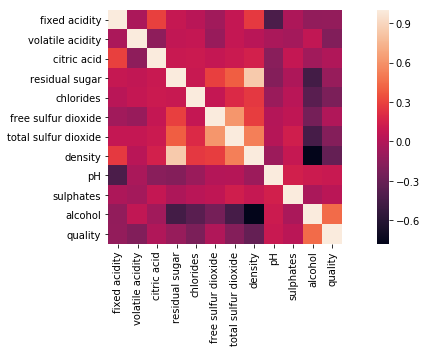

In [75]:
#Correlation of features
cmat = white_wine.corr()
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(cmat,square=True)
f.tight_layout()
#plt.savefig("corr.png")
plt.show()


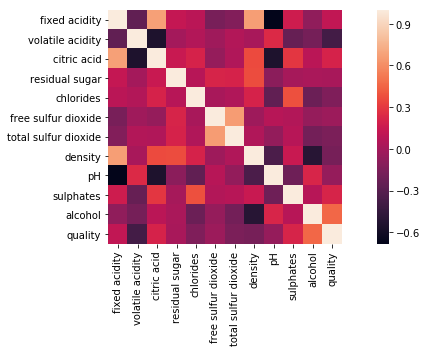

In [76]:
#Correlation of features
cmat = red_wine.corr()
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(cmat,square=True)
f.tight_layout()
#plt.savefig("corr.png")
plt.show()

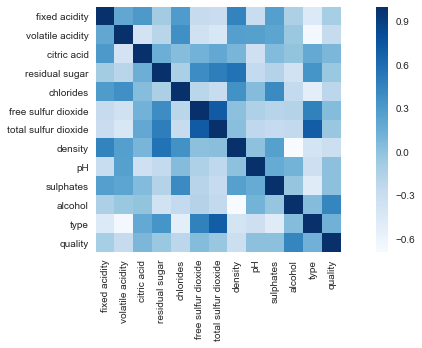

In [9]:
#Correlation of features
cmat = dataset.corr()
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(cmat,square=True,cmap="Blues")
f.tight_layout()
#plt.savefig("corr.png")
plt.show()

Note:<br>
Density and Alcohol have largest negative correlation.
Alcohol and Quality have largest positive correlation.<br>
Other features with large positve or negative correlation do not have a large correlation with quality

In [5]:
dataset.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
fixed acidity,1.000000,0.206331,0.310646,-0.081012,0.294873,-0.268612,-0.297949,0.460315,-0.290145,0.268914,-0.136334,-0.455460,-0.101225
volatile acidity,0.206331,1.000000,-0.376462,-0.191959,0.378049,-0.354008,-0.420756,0.267563,0.262455,0.222228,-0.040137,-0.651044,-0.272138
citric acid,0.310646,-0.376462,1.000000,0.149139,0.035947,0.127059,0.197818,0.095315,-0.334934,0.055909,-0.009106,0.193152,0.086064
residual sugar,-0.081012,-0.191959,0.149139,1.000000,-0.124010,0.397214,0.493276,0.564420,-0.260061,-0.175262,-0.363422,0.345339,-0.039953
chlorides,0.294873,0.378049,0.035947,-0.124010,1.000000,-0.205883,-0.286435,0.362038,0.044950,0.407790,-0.259345,-0.515705,-0.211849
free sulfur dioxide,-0.268612,-0.354008,0.127059,0.397214,-0.205883,1.000000,0.720423,0.021315,-0.138249,-0.184645,-0.171227,0.471828,0.054349
total sulfur dioxide,-0.297949,-0.420756,0.197818,0.493276,-0.286435,0.720423,1.000000,0.030169,-0.230193,-0.266360,-0.253376,0.703093,-0.033176
density,0.460315,0.267563,0.095315,0.564420,0.362038,0.021315,0.030169,1.000000,0.011441,0.260882,-0.691351,-0.385031,-0.315940
pH,-0.290145,0.262455,-0.334934,-0.260061,0.044950,-0.138249,-0.230193,0.011441,1.000000,0.177261,0.116954,-0.327108,0.019526
sulphates,0.268914,0.222228,0.055909,-0.175262,0.407790,-0.184645,-0.266360,0.260882,0.177261,1.000000,-0.019219,-0.480989,0.018163


Feature type has negative correlation with volatile acidity and chlorides,which have a sligh negative correlation with quality<br>
Feature Total Sulfur Dioxide and Free Sulfur Dioxide have high positive correlation but have weak opposite correlation with quality<br>
Feature Density and Residual sugar have positive correlation,which have negative correlation with quality<br>
Feature Total Sulfur Dioxide and Residual Sugar have positive correlation,which both have weak negative correlation with quality

### Display scatter plot

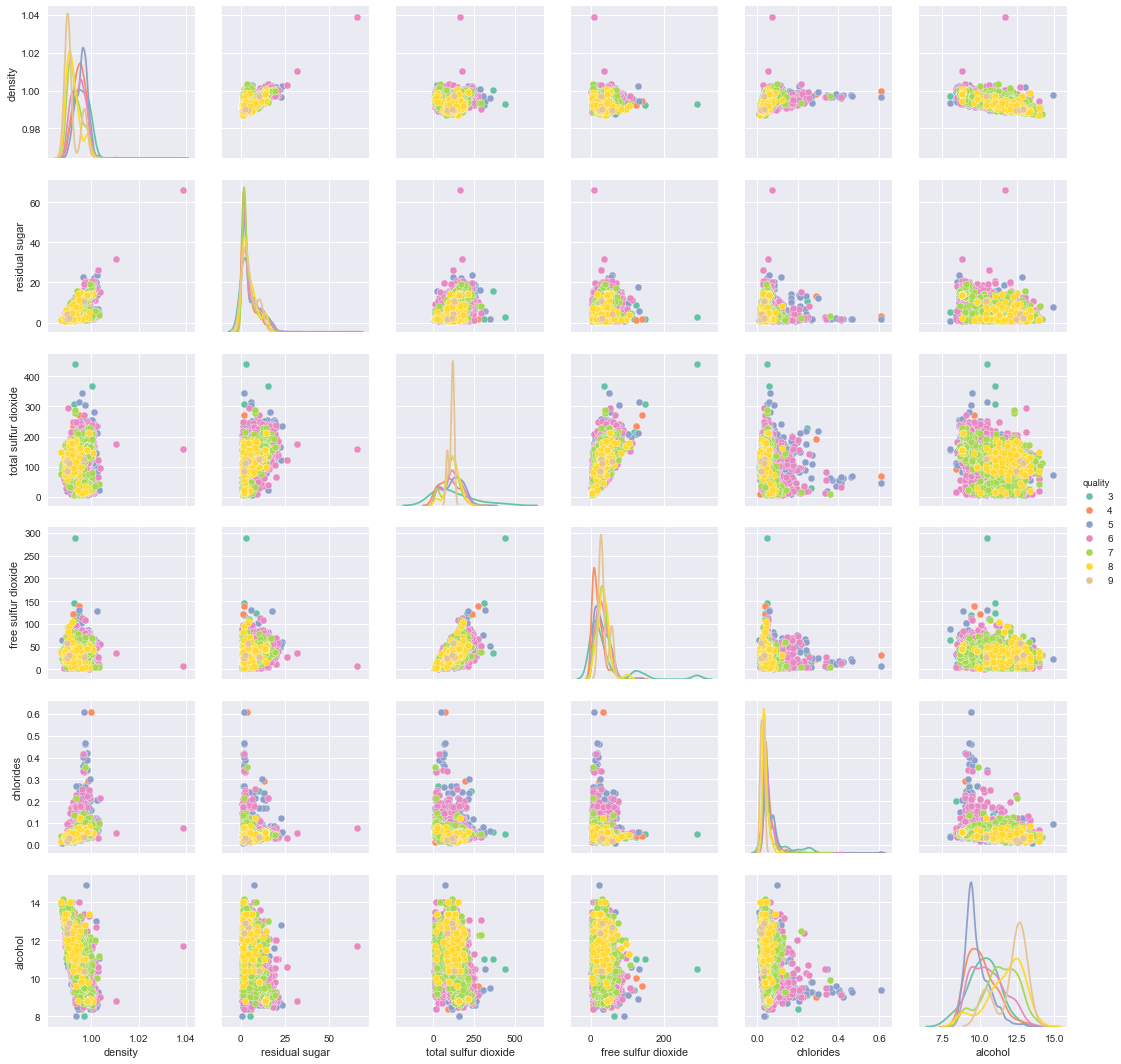

In [14]:
g = sns.pairplot(dataset,vars=["density","residual sugar","total sulfur dioxide","free sulfur dioxide","chlorides","alcohol"], hue="quality", palette="Set2", diag_kind="kde", size=2.5)

I checked correlation between all the variables in wine dataset.

We can see some correlation in pairs like:

alcohol vs. density
fixed.acidity vs. density
residual.sugar vs total.sulfur.dioxide
residual.sugar vs. density
residual.sugar vs. alcohol
chlorides vs. density
chlorides vs. sulphates
quality vs. alcohol

### Scale Features/Clipping

MAE decreases with log10(fixed acidity,residual sugar,chlorides)

A few major Outlier!!!
Most features have minor outliers,probably that even useful ones

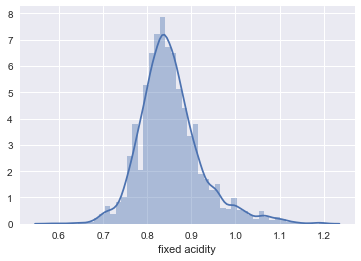

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
#dataset["fixed acidity"] = np.log10(dataset["fixed acidity"])
#dataset_test["fixed acidity"] = np.log10(dataset_test["fixed acidity"])
sns.distplot(dataset["fixed acidity"])

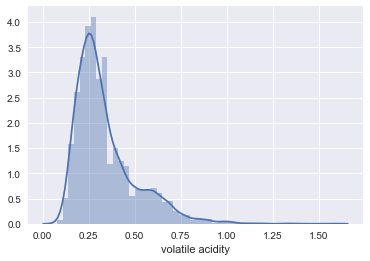

In [17]:
#dataset["volatile acidity"] = np.log10(dataset["volatile acidity"])
sns.distplot(dataset["volatile acidity"])

Volatile Acidity seems to have outliers

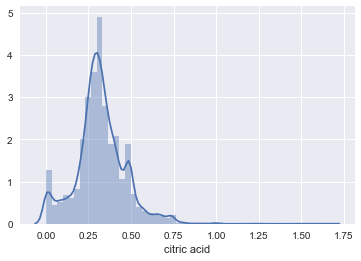

In [16]:
# log not possible
#dataset["citric acid"] = dataset["citric acid"].clip(0,0.625)
sns.distplot(dataset["citric acid"])

Citric Acid seems to have outliers

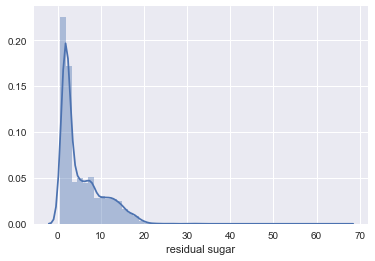

In [15]:
#dataset["residual sugar"] = np.log10(dataset["residual sugar"])
#dataset_test["residual sugar"] = np.log10(dataset_test["residual sugar"])
sns.distplot(dataset["residual sugar"])

Residual Sugar seems to have outliers

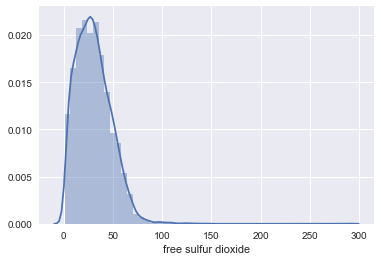

In [14]:
#dataset["free sulfur dioxide"] = np.log10(dataset["free sulfur dioxide"])
#dataset["free sulfur dioxide"] = dataset["free sulfur dioxide"].clip(0,65)
sns.distplot(dataset["free sulfur dioxide"])

Free sulfur dioxide seems to have outliers

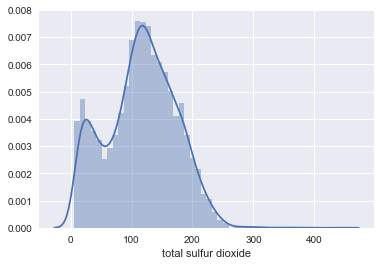

In [13]:
#dataset["total sulfur dioxide"] = np.log10(dataset["total sulfur dioxide"])
#dataset["total sulfur dioxide"] = dataset["total sulfur dioxide"].clip(0,250)
sns.distplot(dataset["total sulfur dioxide"])

Total Sulfur Dioxide seems to have outliers

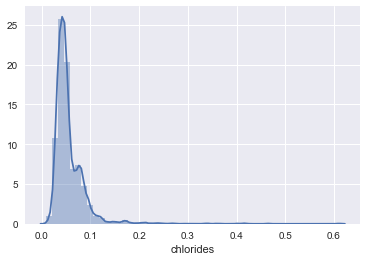

In [9]:
#dataset["chlorides"] = np.log10(dataset["chlorides"])
#dataset_test["chlorides"] = np.log10(dataset_test["chlorides"])
sns.distplot(dataset["chlorides"])

Chlorides feature seems to have outliers

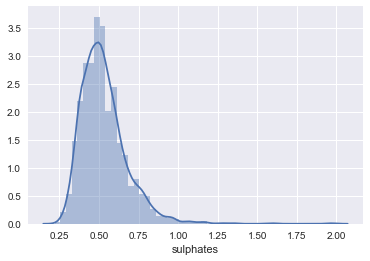

In [10]:
#dataset["sulphates"] = np.log10(dataset["sulphates"])
#dataset["sulphates"] = dataset["sulphates"].clip(0,0.8725)
sns.distplot(dataset["sulphates"])

Sulphates feature seems to have outliers

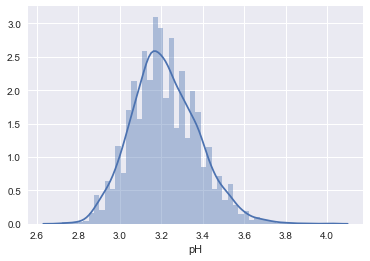

In [11]:
#dataset["pH"] = np.log10(dataset["pH"])
sns.distplot(dataset["pH"])

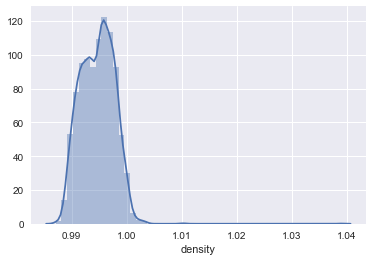

In [20]:
#dataset["density"] = np.log10(dataset["density"])
#dataset["density"] = dataset["density"].clip(0,1.005)
#no difference of clipping
sns.distplot(dataset["density"])

Density Feature seems to have outliers

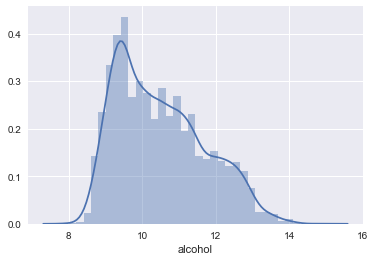

In [19]:
#dataset["alcohol"] = np.log10(dataset["alcohol"])
sns.distplot(dataset["alcohol"])

### Bivariate Analysis

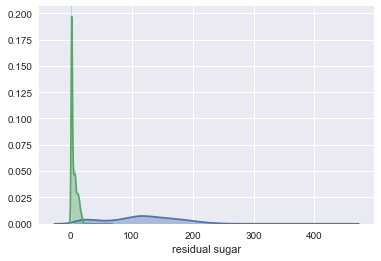

In [11]:
sns.distplot(dataset["total sulfur dioxide"])
sns.distplot(dataset["residual sugar"])

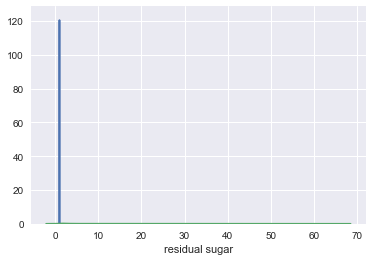

In [12]:
sns.distplot(dataset["density"])
sns.distplot(dataset["residual sugar"])

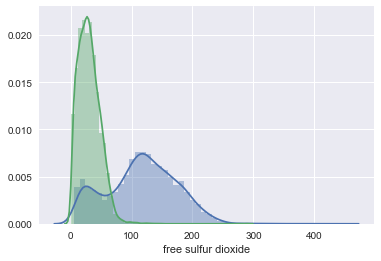

In [18]:
sns.distplot(dataset["total sulfur dioxide"])
sns.distplot(dataset["free sulfur dioxide"])

### Boxplot

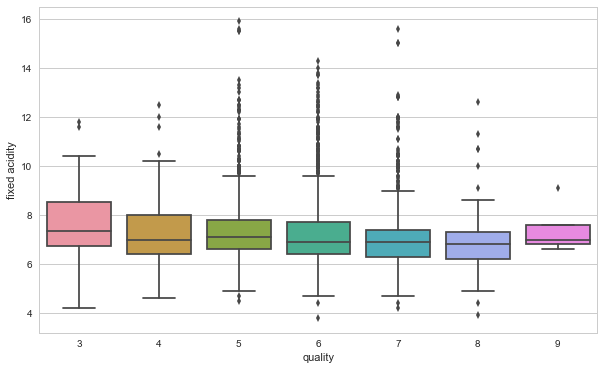

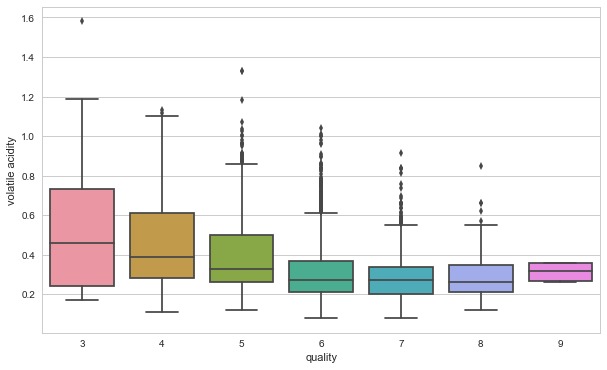

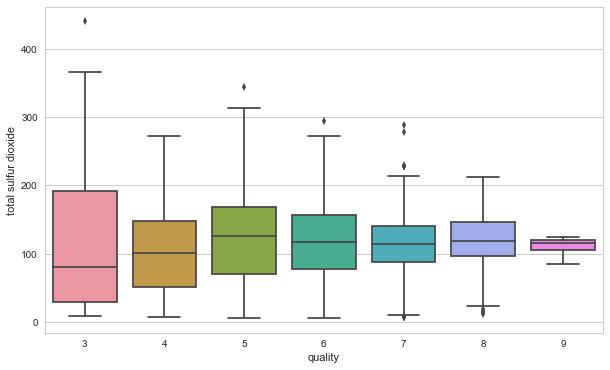

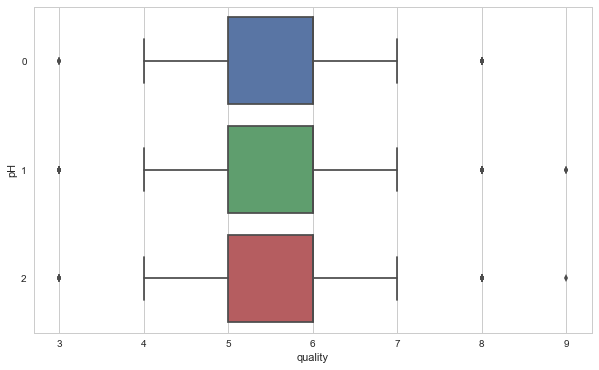

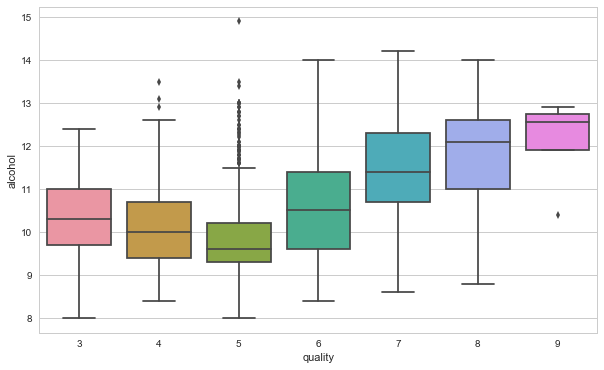

In [140]:
#https://seaborn.pydata.org/generated/seaborn.boxplot.html
#https://seaborn.pydata.org/tutorial/axis_grids.html#plotting-small-multiples-of-data-subsets
import seaborn as sns
import matplotlib.pyplot as plt
#data_train['fixed acidity'] = np.log10(data_train['fixed acidity'])
fig = plt.figure(figsize = (10,6))
sns.set_style("whitegrid")
ax = sns.boxplot(x="quality", y="fixed acidity", data=dataset)
#plt.savefig("fixed_acid_boxplot.png")

fig = plt.figure(figsize = (10,6))
#data_train['volatile acidity'] = np.log10(data_train['volatile acidity'])
ax = sns.boxplot(x="quality", y="volatile acidity", data=dataset)
#plt.savefig("volatile_acid_boxplot.png")

fig = plt.figure(figsize = (10,6))
#data_train['total sulfur dioxide'] = np.log10(data_train['total sulfur dioxide'])
ax = sns.boxplot(x="quality", y="total sulfur dioxide", data=dataset)
#plt.savefig("sulfur_dioxide_boxplot.png")

fig = plt.figure(figsize = (10,6))
#data_train['pH'] = np.log10(data_train['pH'])
ax = sns.boxplot(x="quality", y="pH", data=dataset)
#plt.savefig("pH_boxplot.png")

fig = plt.figure(figsize = (10,6))
#data_train['alcohol'] = np.log10(data_train['alcohol'])
ax = sns.boxplot(x="quality", y="alcohol", data=dataset)
#plt.savefig("alcohol_boxplot.png")

### Add Feature


In [174]:
dataset["t/f"] = dataset["free sulfur dioxide"]/dataset["total sulfur dioxide"]

### Delete Feature 

In [14]:
#dataset = dataset.drop("total sulfur dioxide",axis = 1)
#dataset = dataset.drop("free sulfur dioxide",axis = 1)
dataset = dataset.drop("type",axis = 1)
dataset = dataset.drop("density",axis = 1)
dataset_test = dataset_test.drop("type",axis = 1)
dataset_test = dataset_test.drop("density",axis = 1)

Improved the accuracy of the model

### Buckitizing

In [11]:
#dataset["pH"] = pd.DataFrame(pd.cut(dataset["pH"], bins = [2.6,3,3.1,3.2,3.3,3.4,4.5], labels=[0,1,2,3,4,5])).astype(float)

In [173]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
count,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.00000,5150.000000,1938.000000,5150.000000,5150.000000,5150.000000,5150.000000
mean,7.222786,0.339656,0.319272,5.437951,0.056106,30.634175,115.71466,0.994688,2.089783,0.531206,10.498667,1.753981,5.821359
std,1.297660,0.165322,0.145659,4.812319,0.035536,18.026858,56.80744,0.003037,2.466751,0.150149,1.195424,0.430732,0.875161
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.00000,0.987110,0.000000,0.220000,8.000000,1.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.00000,0.992260,0.000000,0.430000,9.500000,2.000000,5.000000
50%,7.000000,0.290000,0.310000,2.900000,0.047000,29.000000,118.00000,0.994860,0.000000,0.510000,10.300000,2.000000,6.000000
75%,7.700000,0.410000,0.400000,8.100000,0.065000,42.000000,156.00000,0.996987,5.000000,0.600000,11.300000,2.000000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.00000,1.038980,5.000000,2.000000,14.900000,2.000000,9.000000


### Split dataset to feature and label

In [34]:
features = dataset.drop("quality",axis = 1)
labels = dataset["quality"]
print("Dimes features:",features.shape)
print("Dimes labels:",labels.shape)

Dimes features: (5150, 12)
Dimes labels: (5150,)


### Normalize

In [171]:
from sklearn import preprocessing
import pandas as pd
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(features)
features = pd.DataFrame(x_scaled)
features.columns = list( dataset.drop("quality",axis = 1).columns.values)
features.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
count,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000
mean,0.438820,0.173104,0.192332,0.389750,0.407654,0.102896,0.252799,0.146096,0.386137,0.174835,0.362126,0.753981
std,0.114470,0.110215,0.087747,0.184552,0.102886,0.062593,0.130893,0.058545,0.124641,0.084353,0.173250,0.430732
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.364208,0.100000,0.150602,0.233874,0.341490,0.055556,0.163594,0.099287,0.302326,0.117978,0.217391,1.000000
50%,0.426816,0.140000,0.186747,0.335403,0.391885,0.097222,0.258065,0.149412,0.372093,0.162921,0.333333,1.000000
75%,0.493405,0.220000,0.240964,0.554065,0.468758,0.142361,0.345622,0.190428,0.465116,0.213483,0.478261,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Split to X_train,X_test,y_test and y_train

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=0)

In [14]:
features.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
count,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.00000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000
mean,7.222786,0.339656,0.319272,5.437951,0.056106,30.634175,115.71466,0.994688,3.218117,0.531206,10.498667,1.753981
std,1.297660,0.165322,0.145659,4.812319,0.035536,18.026858,56.80744,0.003037,0.160787,0.150149,1.195424,0.430732
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.00000,0.987110,2.720000,0.220000,8.000000,1.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.00000,0.992260,3.110000,0.430000,9.500000,2.000000
50%,7.000000,0.290000,0.310000,2.900000,0.047000,29.000000,118.00000,0.994860,3.200000,0.510000,10.300000,2.000000
75%,7.700000,0.410000,0.400000,8.100000,0.065000,42.000000,156.00000,0.996987,3.320000,0.600000,11.300000,2.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.00000,1.038980,4.010000,2.000000,14.900000,2.000000


### Dimensionality Reduction

In [26]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 12)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([9.54332747e-01, 4.04261622e-02, 4.84482210e-03, 3.47315230e-04,
       2.70309128e-05, 8.80132028e-06, 5.59685204e-06, 3.86815355e-06,
       2.82413533e-06, 6.33733718e-07, 1.98436796e-07, 1.33921176e-10])

In [45]:
# Applying LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 12)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

C:\Users\makkh\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


In [55]:
# Applying Kernel PCA
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 12, kernel = 'rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

### Backward Elimination

In [35]:
#building an optimal model using Backward Elimination
import statsmodels.formula.api as sm
#adding x0 = 1 for statsmodel,not take x0 into account by default
X = np.append(arr = np.ones((5150,1)).astype(int),values = features,axis = 1)
X_opt = X[:,[0,1,2,3,4,5,6,7,8,9,10,11,12]] 
#Step 2 = Fit the full model with all possible predictors
regressor_OLS = sm.OLS(endog = labels,exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     185.3
Date:                Mon, 14 May 2018   Prob (F-statistic):               0.00
Time:                        23:33:04   Log-Likelihood:                -5694.0
No. Observations:                5150   AIC:                         1.141e+04
Df Residuals:                    5137   BIC:                         1.150e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        107.9097     15.660      6.891      0.000      77.209     138.611
x1             0.0862      0.018      4.905      0.000       0.052       0.121
x2            -1.5040      0.090    -16.653      0.000      -1.681      -1.327
x3            -0.0474      0.089     -0.532      0.595      -0.222       0.128
x4             0.0642      0.007      9.690      0.000       0.051       0.077
x5            -0.8471      0.371     -2.280      0.023      -1.575      -0.119
x6             0.0042      0.001      4.964      0.000       0.003       0.006
x7            -0.0013      0.000     -3.667      0.000      -0.002      -0.001
x8          -106.8359     15.851     -6.740      0.000    -137.911     -75.761
x9             0.5415      0.101      5.365      0.000       0.344       0.739
x10            0.6512      0.085      7.692      0.000       0.485       0.817
x11            0.2249      0.020     11.286      0.000       0.186       0.264
x12           -0.3666      0.063     -5.820      0.000      -0.490      -0.243
==============================================================================
Omnibus:                      115.413   Durbin-Watson:                   1.663
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.141
Skew:                          -0.004   Prob(JB):                     3.24e-57
Kurtosis:                       4.101   Cond. No.                     2.92e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
X_opt = X[:,[0,11]] 
#Step 2 = Fit the full model with all possible predictors
regressor_OLS = sm.OLS(endog = labels,exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     241.3
Date:                Mon, 14 May 2018   Prob (F-statistic):               0.00
Time:                        23:33:49   Log-Likelihood:                -5712.9
No. Observations:                5150   AIC:                         1.145e+04
Df Residuals:                    5140   BIC:                         1.151e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         63.4619     12.973      4.892      0.000      38.028      88.895
x1             0.0689      0.017      4.127      0.000       0.036       0.102
x2            -1.3256      0.079    -16.765      0.000      -1.481      -1.171
x3             0.0471      0.006      8.361      0.000       0.036       0.058
x4             0.0052      0.001      6.324      0.000       0.004       0.007
x5            -0.0024      0.000     -8.048      0.000      -0.003      -0.002
x6           -63.0090     13.230     -4.763      0.000     -88.945     -37.073
x7             0.5295      0.099      5.362      0.000       0.336       0.723
x8             0.6649      0.082      8.063      0.000       0.503       0.827
x9             0.2662      0.018     14.400      0.000       0.230       0.302
==============================================================================
Omnibus:                      119.341   Durbin-Watson:                   1.662
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              271.908
Skew:                          -0.027   Prob(JB):                     9.04e-60
Kurtosis:                       4.124   Cond. No.                     2.42e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Optimal number of features : 12


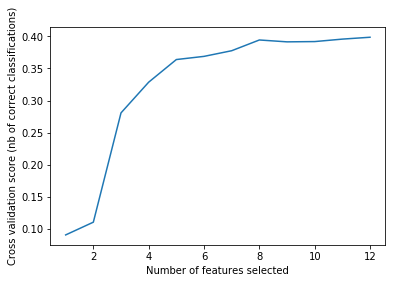

In [9]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification


# Create the RFE object and compute a cross-validated score.
rf = RandomForestRegressor(random_state = 0)
# The "accuracy" scoring is proportional to the number of correct
# classifications

rfecv = RFECV(rf, step=1, cv=5)
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()



### Univariate feature selection

In [66]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
kk = SelectKBest(chi2, k=9)
X_new = kk.fit_transform(X_train, y_train)

"""Most Relevant for RFC
fixed acidity            
volatile acidity        
citric acid               
residual sugar           
chlorides                 
free sulfur dioxide      
total sulfur dioxide   
alcohol                  
type"""               

'Most Relevant for RFC\nfixed acidity            \nvolatile acidity        \ncitric acid               \nresidual sugar           \nchlorides                 \nfree sulfur dioxide      \ntotal sulfur dioxide   \nalcohol                  \ntype'

### Removing features with low variance

In [67]:
from sklearn.feature_selection import VarianceThreshold
X = X_train
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

array([[  5.8 ,  12.3 ,  55.  , 170.  ,   9.3 ,   2.  ],
       [  6.8 ,   1.2 ,  25.  , 111.  ,  10.7 ,   2.  ],
       [  6.4 ,   1.  ,   9.  , 131.  ,  10.8 ,   2.  ],
       ...,
       [  6.4 ,   2.25,   8.  , 210.  ,   9.9 ,   2.  ],
       [  7.7 ,   1.4 ,  47.  , 150.  ,   9.2 ,   2.  ],
       [  6.4 ,   1.6 ,  36.  , 127.  ,  10.4 ,   2.  ]])

### Model Training

In [70]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

#classifier = RandomForestRegressor(n_estimators = 250,criterion="mse",max_features=None,max_depth=None,warm_start =True,bootstrap =True,random_state = 0)
classifier = RandomForestClassifier(n_estimators = 250,random_state = 0)
classifier.fit(X_train,y_train)
predicted = classifier.predict(X_test).round()
print("Accuracy:",accuracy_score(y_test, predicted))
print("MAE:",mean_absolute_error(y_test, predicted))
#Initial:MAE: 0.3610248447204969
#Clip Best MAE: 0.358695652173913
#Best 0.35714285714285715

Accuracy: 0.6700310559006211
MAE: 0.36024844720496896


### Model Boosting

In [71]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print(accuracies.mean())
print(accuracies.std())

C:\Users\makkh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.64446954020186
0.01775249419912407


### Applying RandomizedSearch to tune model

In [19]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [20]:
from sklearn.ensemble import RandomForestRegressor
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 4, verbose=2, random_state=42, n_jobs=-1)

In [21]:
# Fit the random search model
rf_random.fit(features, labels)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 27.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 61.3min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 67.1min finished


RandomizedSearchCV(cv=4, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_absolute_error',
          verbose=2)

In [22]:
rf_random.best_estimator_   

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=1600, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [3]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(bootstrap= False,
                             max_depth= 90,
                             max_features= "sqrt",
                             min_samples_leaf= 1,
                             min_samples_split= 2,
                             n_estimators= 1200)
rf.fit(features, labels)

NameError: name 'features' is not defined

In [2]:
write_test_pred = rf.predict(dataset_test).round()
arange = np.arange(1,write_test_pred.size+1)
df = pd.DataFrame({"id" : arange, "prediction" : write_test_pred})
df.to_csv("result1.csv", index=False)
write_test_pred.value_counts()

NameError: name 'rf' is not defined